# **Self-supervised Learning: Fashion Classification**
## Advanced Topics in Machine Learning Project Report
University of Bern, 2019

Contributors: Ramona Beck, David Berger, Nathalie Froidevaux, Gwenael Gendre

## Goal of the project
The task we chose is images classification on fashion images using self supervised learning. We use two different data sets: the FashionMNIST dataset (https://github.com/zalandoresearch/fashion-mnist by Xiao et al.), comprising 70'000 images in 10 categories and the DeepFashion Dataset (http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion.html) which consists of approximately 290'000 images, separated in 50 categories. 

## Description of the methods

We implement self-supervised methods with three different self-supervised tasks. We first train a CIFAR-Net network (*link*) for every sub-task. Afterwards we add a linear classifier on top of it and apply finetuning to both the CIFFAR-Net and the linear classifier. In the end we test the fine-tuned model using labeled images and predict the images categories. Training for the sub-tasks and fine-tuning is done using the Cross-Entropy loss function, with Adam optimizers and decaying learning rates.   

Here are the three different sub-tasks.

- Rotation prediction (based on https://github.com/gidariss/FeatureLearningRotNet by Gidaris et al.). 

    The CIFAR-Net network is trained to predict the rotation of the image. Therefore we apply four different rotations (0°, 90°, 180°, 270°) to each image and associate it with the rotated angle. We then use labeled images to fine-tune the last two linear layers that will serve as classifier. The code is found in `rotation.py` .

- Discriminative feature learning with Exemplar CNN (based on https://arxiv.org/abs/1406.6909 by Dosovitskiy et al.)

    For this sub-task, each image is transformed 6 times via a horizontal flip, cropping, resized cropping, color jitter, rotation and affine transformation. The original image and its transformations constitute a new class. The network then learns to classify all the variants of each image. This sub-task is found under `exemplar_cnn.py` 

- Auto-Encoding Transformations (based on https://arxiv.org/abs/1901.04596 by Qi et al.)

    We train a standard auto-encoder where we use the CIFAR-Net as encoder and and a decoder that is built accordingly. The code for this sub-task is found in `autoencoder.py` and `decoder.py`.

In addition, we also directly trained our network with supervised learning to allow us to have a comparison with the self-supervised tasks. The code can be found under `supervised_deep_fashion.py`. 

Therefore, for each dataset, we can compare the three subtasks with supervised training and compare the accuracies. 

## Results

Here are the results of the different methods for the different subtasks: 

- For the fashionMNIST data set we use 42'000 images for training, 18'000 for validation and 10'000 for testing.
- For the deepFashion data set we use 209'222 images for training, 40'000 for validation and 40'000 for testing.

*one table format*

|Dataset|Experiment|Test Accuracy|Pretraining params|Finetuning params|
|---|---|---:|---|---|
|FashionMNIST|Supervised|0 %|lr = 0.01, 15 epochs|lr = 0.001, 5 epochs|
|FashionMNIST|AET|0 %|lr = 0.01, 15 epochs|lr = 0.001, 5 epochs|
|FashionMNIST|Exemplar CNN|0 %|lr = 0.01, 15 epochs|lr = 0.001, 5 epochs|
|FashionMNIST|Rotation Prediction|0 %|lr = 0.01, 15 epochs|lr = 0.001, 5 epochs|


*another possible format*

**Deep Fashion Dataset**

|Experiment|Test Accuracy|Pretraining params|Finetuning params|
|---|---:|---|---|
|Supervised|0 %|lr = 0.01, 15 epochs|lr = 0.001, 5 epochs|
|Supervised|0 %|*maybe we have*|*other params here*|
|AET|0 %|lr = 0.01, 15 epochs|lr = 0.001, 5 epochs|
|Exemplar CNN|0 %|lr = 0.01, 15 epochs|lr = 0.001, 5 epochs|
|Rotation Prediction|0 %|lr = 0.01, 15 epochs|lr = 0.001, 5 epochs|


*also possible to put it in LaTeX*

![title](table_example.JPG)


## Examples of Use

You need to download the DeepFashion dataset and place it in the root directory in a folder called `/img`. You also have to download the following text files that contain additional informations to each image:
- list_category_cloth.txt: specifies the category name for each category
- list_category_img.txt: specifies the clothing category labels
- list_eval_partition.txt: specifies the image names for training, validation and testing set respectively

Put these textfiles in the root directory.

- The dataset can be found under: http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion.


After that the only thing you need to do is execute the main.py file. This will start the whole process.

1. The main.py file will then start the training of the different pretraining methods.
2. After the training the model is finetuned.
3. In a final step we evalute each method with the testset of each dataset.

In each step we are able to plot the curves and to compare the results. These plots get saved in a folder named /Plot.

In [1]:
# Here are some sample images from the FashionMnist and DeepFashion Dataset
# First we need to import some libraries, so we can display the pictures.
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision
from PIL import Image

# after that we need to load the two datasets
fashionmnist = torchvision.datasets.FashionMNIST('fashion_mnist/', train=True, download=True)

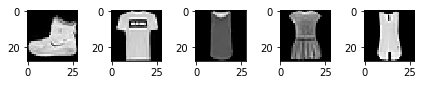

In [2]:
# here are some pictures of the fashionMNIST dataset
fig = plt.figure()
for i in range (len(fashionmnist)):
    sampleImg = fashionmnist[i][0]
    fig.add_subplot(1,5,i+1)
    plt.imshow(sampleImg, cmap='gray')
    plt.tight_layout()
    if i == 4:   
        plt.show()  
        break

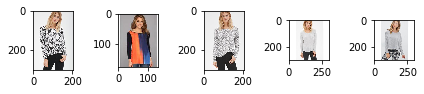

In [3]:
# here are some pictures of the DeepFashion dataset
# in the dataloader they all get scaled to the size of 32x32 pixel

image1 = Image.open('img/Abstract_Brushstroke_Pocket_Top/img_00000001.jpg')
image2 = Image.open('img/Abstract_Brushstroke_Pocket_Top/img_00000002.jpg')
image3 = Image.open('img/Abstract_Brushstroke_Pocket_Top/img_00000003.jpg')
image4 = Image.open('img/Abstract_Brushstroke_Pocket_Top/img_00000004.jpg')
image5 = Image.open('img/Abstract_Brushstroke_Pocket_Top/img_00000005.jpg')
deepfashion = [image1, image2, image3, image4, image5]

fig1 = plt.figure()
for i, img in enumerate(deepfashion):
    fig1.add_subplot(1, 5, i+1)
    plt.imshow(img, cmap='gray')    
    plt.tight_layout()

plt.show()


For each method we have different training methods. Here is a code snippet from the Image Rotation Prediction where we 
- Call the model.
- Define the loss, optimizer and scheduler.
- Train the network

```python
def train_rotation_net():

    """Trains the rotation model."""
    print("=============================================================")
    print("========== Train Rotation Model with FashionMNIST ===========")
    print("=============================================================\n")

    model = CifarNet(input_channels=1, num_classes=4)
    model = model.to(DEVICE)

    # Criteria NLLLoss which is recommended with Softmax final layer
    loss_fn = nn.CrossEntropyLoss()

    # Observe that all parameters are being optimized
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Decay LR by a factor of 0.1 every 4 epochs
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=4, gamma=0.1)

    return train(model, loss_fn, optimizer, scheduler, EPOCHS, train_loader_fashion_mnist, val_loader_fashion_mnist)

```

Our model, called CifarNet is built like this:

```python
class CifarNet(nn.Module):
    """CifarNet model"""

    def __init__(self, input_channels, num_classes=10):
        super(CifarNet, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 64, kernel_size=(5, 5), bias=False)
        self.max1 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        self.batch1 = nn.BatchNorm2d(num_features=64)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=(5, 5), bias=False)
        self.batch2 = nn.BatchNorm2d(num_features=64)
        self.max2 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        self.flat = flatten
        self.fc1 = nn.Linear(1600, 384, bias=True)
        self.drop = nn.Dropout(0.5)
        self.fc2 = nn.Linear(384, 192, bias=True)
        self.fc3 = nn.Linear(192, num_classes, bias=True)

    def forward(self, x):
        out = self.conv1(x)
        out = self.max1(out)
        out = self.batch1(out)
        out = self.conv2(out)
        out = self.batch2(out)
        out = self.max2(out)
        out = self.flat(out)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out
```

After the training it is necessary that we finetune the model before we test it with the Deepfashion dataset:
- We define the loss function, optimizer and scheduler again
- Replace the last linear layer `self.fc3` by two fully connected layers 
- We freeze all layers except the last two ones. 
- In the last step we call the fine tuning function. 


    
```python
def fine_tune_rotation_model(model):
    """Fine tunes the rotation model."""
    print("=============================================================")
    print("======== Fine Tune Rotation Model with FashionMNIST =========")
    print("=============================================================\n")

    # Criteria NLLLoss which is recommended with Softmax final layer
    loss_fn = nn.CrossEntropyLoss()

    # freezes all layers except the final one, according to the method parameters

    for param in model.parameters():
        param.requires_grad = False

    for param in model.fc3.parameters():
        param.requires_grad = True

    # replace fc layer with 10 outputs
    model.fc3 = nn.Sequential(nn.Linear(192, 192),
                              nn.Linear(192, 10, bias=True)
                              )

    # Observe that all parameters are being optimized
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Decay LR by a factor of 0.1 every 4 epochs
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=4, gamma=0.1)

    model = model.to(DEVICE)
    return fine_tune(model, loss_fn, optimizer, scheduler, EPOCHS, train_loader_fashion_mnist, val_loader_fashion_mnist)

```



All that is left in the final step is to test the trained model on a testset for classification purposes. We keep the same loss function and call the function from `test.py`

```python
def test_classification_on_rotation_model(model):
    """Tests the rotation model."""
    print("=============================================================")
    print("== Test Classification on Rotation Model with FashionMNIST ==")
    print("=============================================================\n")
    loss_fn = nn.CrossEntropyLoss()
    model = model.to(DEVICE)
    return test(model, loss_fn, EPOCHS, test_loader_fashion_mnist)
```